<a href="https://colab.research.google.com/github/Healthy-Manish/Disease_Detector_Of_Plant_Model/blob/master/app/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import tensorflow as tf

random.seed(0)
np.random.seed(0)

tf.random.set_seed(0)


In [ ]:
import os
import json
from zipfile import ZipFile

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:37<00:00, 28.4MB/s]
100% 2.04G/2.04G [01:37<00:00, 22.5MB/s]


In [ ]:
zip_ref =ZipFile('/content/plantvillage-dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
print(os.listdir("plantvillage dataset/"))


print(len(os.listdir("plantvillage dataset/segmented/")))
print(os.listdir("plantvillage dataset/segmented/")[:5])

print(len(os.listdir("plantvillage dataset/grayscale/")))
print(os.listdir("plantvillage dataset/grayscale/")[:5])

['segmented', 'grayscale', 'color']
38
['Raspberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Esca_(Black_Measles)']
38
['Raspberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Esca_(Black_Measles)']


In [ ]:
base_dir = "plantvillage dataset/color"

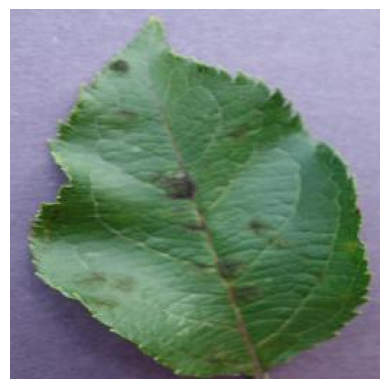

(256, 256, 3)


In [ ]:
img_path = "/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
img = mping.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [ ]:
img_size = 224
batch_size = 32



In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 #use 20% of data for validation
)


In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset= 'training',
    class_mode = 'categorical'
    )

Found 43456 images belonging to 38 classes.


In [ ]:
# validation generator

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.9875 - loss: 0.0431 - val_accuracy: 0.8760 - val_loss: 0.6367
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.2242e-04
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 75ms/step - accuracy: 0.9828 - loss: 0.0597 - val_accuracy: 0.8815 - val_loss: 0.6050
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 8.0434e-04
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 101s 74ms/step - accuracy: 0.9931 - loss: 0.0236 - val_accuracy: 0.8728 - val_loss: 0.6886


In [ ]:
val_loss,accuracy_loss = model.evaluate(validation_generator,steps = validation_generator.samples // batch_size)
print("Validation Loss:", val_loss)
print("Accuracy Loss:", accuracy_loss)

339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8720 - loss: 0.7109
Validation Loss: 0.6884448528289795
Accuracy Loss: 0.8728798031806946


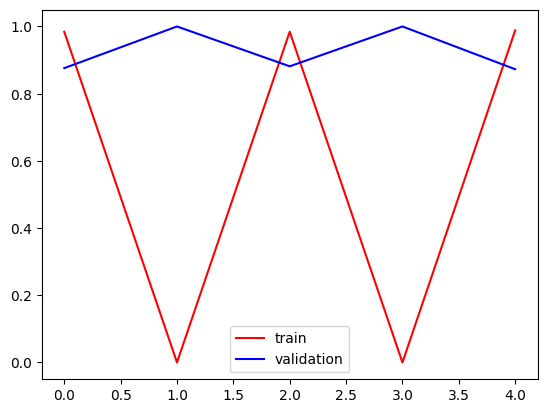

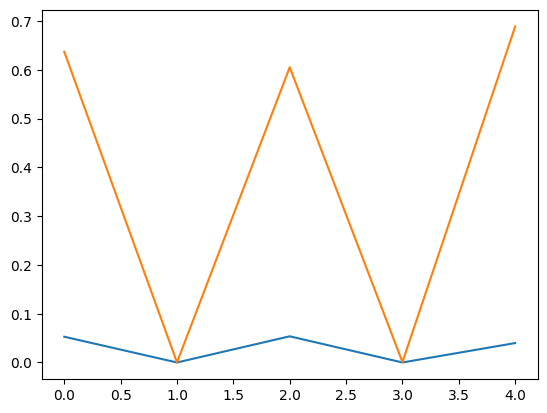

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label='validation')
plt.show()

In [ ]:
def load_and_process_image(image_path,target_size = (224,224)):
    img= Image.open(image_path)

    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

def predict_image_class(model,image_path,class_indices):
    processed_image = load_and_process_image(image_path)
    predictions = model.predict(processed_image)
    predict_class_index = np.argmax(predictions,axis=1)[0]
    predicted_class = class_indices[predict_class_index]

    return predicted_class

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
# testing

img_path = "/content/plantvillage dataset/color/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG"
predicted_class = predict_image_class(model,img_path,class_indices)
print(f"The predicted class for the image is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted class for the image is: Apple___Black_rot


##**Saving the model**

In [ ]:
model.save('drive/My Drive/plant_disease_model.h5')